Pandas é uma biblioteca Python muito útil para manipulação de dados. Ela trabalha basicamente com duas estruturas: [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) e [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).
    
Series são similares aos vetores, porém, a Serie possui um rótulo. DataFrame é similar a matrizes, porém, cada coluna e linha também pode possuir um rótulo. Além disso, com tais estruturas, vocês podem usar diversos métodos para obter, manipular, agrupar e filtrar os dados [Veja aqui mais propriedades dessas duas estruturas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html).

Este roteiro é bem introdutório apenas com as funcionalidades mais importantes (e as que iremos usar mais frequentemente nas práticas). Para roteiros mais abrangentes, recomendo: [link1](https://www.machinelearningplus.com/python/101-pandas-exercises-python/), [link2](https://www.kaggle.com/marcelopacote/curso-pandas-primeira-lista-de-exercicios).


In [1]:
import pandas as pd
import numpy as np

## Series

Series é similar a um vetor, porém é possível definir rótulos aos indices além de realizar manipulações e consultas facilmente

In [2]:
idade = pd.Series([10,40,40,20])
print(idade)

0    10
1    40
2    40
3    20
dtype: int64


In [4]:
idades = pd.Series([10,40,40,20],index=["Alice","Bob","Carol","Daniel"])
print(idades)

Alice     10
Bob       40
Carol     40
Daniel    20
dtype: int64


Comandos interessantes: é possivel, neste exemplo, quantas pessoas tem uma determinada idade:

In [5]:
idades.value_counts()

40    2
20    1
10    1
dtype: int64

Além de outras estatisticas

In [6]:
idades.describe()

count     4.0
mean     27.5
std      15.0
min      10.0
25%      17.5
50%      30.0
75%      40.0
max      40.0
dtype: float64

**Navegando nos valores de value_counts**:

In [7]:
for idade,qtd_pessoas in idades.value_counts().iteritems():
    print("Idade: "+str(idade)+" Quantidade: "+str(qtd_pessoas))

Idade: 40 Quantidade: 2
Idade: 20 Quantidade: 1
Idade: 10 Quantidade: 1


## DataFrame

DataFrame é similar a uma matriz, porém, possui operações de filtrar, contabilizar e manipular elementos. Para cada coluna, colocamos seus elementos.

In [8]:
contatos = pd.DataFrame({'Nome' : ["Alice", "Bob", "Carol", "Daniel", "Elisa"],
                   'Idade' : [12, 34, 12, 32,23],
                   'Altura': [1.4,1.6,1.35,1.5,1.55],
                   'Cidade' : ["Belo Horizonte","São Paulo","São Paulo","Rio de Janeiro","Belo Horizonte"],
                   })

In [9]:
contatos

,Nome,Idade,Altura,Cidade
0,Alice,12,1.40,Belo Horizonte
1,Bob,34,1.60,São Paulo
2,Carol,12,1.35,São Paulo
3,Daniel,32,1.50,Rio de Janeiro
4,Elisa,23,1.55,Belo Horizonte


Outra forma de criar:

In [10]:
pd.DataFrame([["Alice",12 ,1.4  , "Belo Horizonte"],
               ["Bob",34, 1.6,"São Paulo"],
                ["Carol",12,1.35, "São Paulo"],
                ["Daniel",31, 1.5, "Rio de Janeiro"],
                ["Elisa",23, 1.55, "Belo Horizonte"],
                        ],
                       columns = ["Nome","Idade","Altura","Cidade"])

,Nome,Idade,Altura,Cidade
0,Alice,12,1.40,Belo Horizonte
1,Bob,34,1.60,São Paulo
2,Carol,12,1.35,São Paulo
3,Daniel,31,1.50,Rio de Janeiro
4,Elisa,23,1.55,Belo Horizonte


**Adicionar uma nova coluna**

In [11]:
contatos["Peso"] =  pd.Series([20,50,45,55,60])

**Funções para ordenar:**

In [12]:
contatos_ord = contatos.sort_values(by="Idade")
contatos_ord

,Nome,Idade,Altura,Cidade,Peso
0,Alice,12,1.40,Belo Horizonte,20
2,Carol,12,1.35,São Paulo,45
4,Elisa,23,1.55,Belo Horizonte,60
3,Daniel,32,1.50,Rio de Janeiro,55
1,Bob,34,1.60,São Paulo,50


Atenção: Assim como a maioria das operações, é retornado um DataFrame ordenado. O DataFrame **contatos** não muda a sua ordem. Para que seja feita a alteração direta no DataFrame, usamos inplace=True

In [13]:
contatos.sort_values(by="Altura",inplace=True)
contatos

,Nome,Idade,Altura,Cidade,Peso
2,Carol,12,1.35,São Paulo,45
0,Alice,12,1.40,Belo Horizonte,20
3,Daniel,32,1.50,Rio de Janeiro,55
4,Elisa,23,1.55,Belo Horizonte,60
1,Bob,34,1.60,São Paulo,50


**Filtrar**:

In [14]:
contatos[contatos["Idade"]<18]

,Nome,Idade,Altura,Cidade,Peso
2,Carol,12,1.35,São Paulo,45
0,Alice,12,1.40,Belo Horizonte,20


**Agrupar e cal**

In [15]:
contatos.groupby(["Cidade"]).mean()

,Idade,Altura,Peso
Cidade,,,
Belo Horizonte,17.5,1.475,40.0
Rio de Janeiro,32.0,1.500,55.0
São Paulo,23.0,1.475,47.5


**Como cada coluna é uma série, podemos usar o value_counts**:

In [16]:
contatos["Cidade"].value_counts()

São Paulo         2
Belo Horizonte    2
Rio de Janeiro    1
Name: Cidade, dtype: int64

**Visualizar os resultados**

<AxesSubplot:xlabel='Idade', ylabel='Altura'>

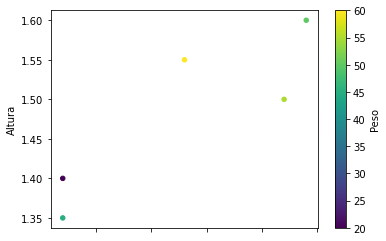

In [17]:
contatos.plot.scatter(x='Idade',
                       y='Altura',
                       c='Peso',
                     colormap='viridis')

<AxesSubplot:xlabel='Idade', ylabel='Altura'>

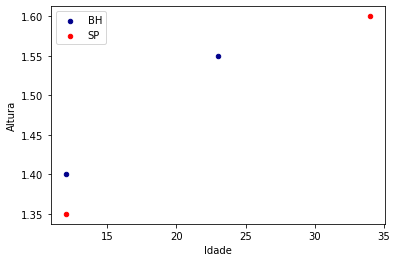

In [18]:
#filtra os contatos por cidade (para fazer grupos)
contatosBH = contatos[contatos["Cidade"]=="Belo Horizonte"]
contatosSP = contatos[contatos["Cidade"]=="São Paulo"]

#Cria o plot com os dois grupos
plot_gp1 = contatosBH.plot.scatter(x='Idade', y='Altura', color='DarkBlue', label='BH')
contatosSP.plot.scatter(x='Idade', y='Altura', color='Red', label='SP',ax=plot_gp1)

Veja: [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html), [exemplos](https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c) e [mais exemplos](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)